In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import PIL
from PIL import Image 
import scipy as sy
from scipy.ndimage.filters import convolve
from skimage import transform 
from skimage import filters 

In [2]:
path = '/content/drive/MyDrive/msml_640/Yaaqob_Aisin_ASN2/'

# **SeamCarvingReduceWidth.m(py)**

[[[220 220 232]
  [219 219 231]
  [218 218 230]
  ...
  [ 84  73  43]
  [ 96  84  68]
  [ 96  85  67]]

 [[222 222 234]
  [222 222 232]
  [222 222 232]
  ...
  [ 99  88  84]
  [153 144 127]
  [ 70  58  62]]

 [[225 225 233]
  [225 225 233]
  [225 225 233]
  ...
  [205 197 194]
  [143 133 142]
  [ 62  53  70]]

 ...

 [[194 189 185]
  [188 183 179]
  [178 173 169]
  ...
  [153 155 154]
  [154 156 155]
  [154 156 155]]

 [[ 72  64  62]
  [ 64  56  54]
  [ 53  48  44]
  ...
  [168 170 169]
  [169 171 170]
  [171 173 172]]

 [[142 134 132]
  [145 137 135]
  [153 145 143]
  ...
  [180 182 181]
  [180 182 181]
  [182 184 183]]]


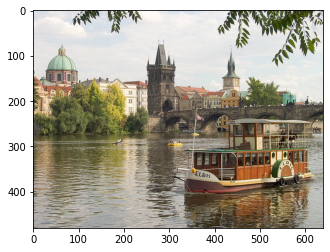

In [3]:
testImage=mpimg.imread(path+'inputSeamCarvingPrague.jpg') 
plt.imshow(testImage)
print(testImage)

In [4]:
pip install git+https://github.com/li-plus/seam-carving.git@master

  Cloning https://github.com/li-plus/seam-carving.git (to revision master) to /tmp/pip-req-build-rkwsw990
  Running command git clone -q https://github.com/li-plus/seam-carving.git /tmp/pip-req-build-rkwsw990
  Created wheel for seam-carving: filename=seam_carving-1.0.0-cp36-none-any.whl size=10006 sha256=4ad9428ab3a213ed1616efd8fece9d4ff79914f42fb518a589c8ee5f682337d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-_ksbzho3/wheels/85/d6/4c/c4bd5e8aaa784e6a9e7452969dce8bbf41e34454c021cbed37
Successfully built seam-carving


In [5]:
import seam_carving
#method mimiced from https://pypi.org/project/seam-carving/

In [6]:
testImage_h, testImage_w,_= testImage.shape

dst_w_1 = seam_carving.resize(
    testImage, (testImage_w-100,testImage_h-0),
    energy_mode='forward',  
    order='width-first',  
    keep_mask=None
)

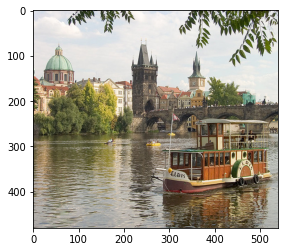

In [7]:
plt.imshow(dst_w_1)
plt.savefig(path+'outputReduceWidthPrague.png')

In [8]:
print(testImage.shape,dst_w_1.shape)

(480, 640, 3) (480, 540, 3)


[[[51 43 67]
  [49 43 69]
  [49 43 71]
  ...
  [22 22 24]
  [23 23 25]
  [22 22 24]]

 [[51 43 66]
  [49 41 65]
  [49 40 67]
  ...
  [22 22 24]
  [22 22 24]
  [22 22 24]]

 [[48 38 62]
  [47 37 61]
  [46 36 60]
  ...
  [22 22 24]
  [22 22 24]
  [22 22 24]]

 ...

 [[26 26 28]
  [25 25 27]
  [25 25 27]
  ...
  [25 26 28]
  [25 25 27]
  [23 23 25]]

 [[25 25 27]
  [25 24 29]
  [27 26 31]
  ...
  [24 25 27]
  [24 25 27]
  [23 23 25]]

 [[25 25 27]
  [25 25 27]
  [26 26 28]
  ...
  [25 25 25]
  [25 25 25]
  [23 23 23]]]


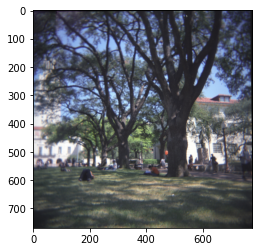

In [9]:
testImage_2=mpimg.imread(path+'inputSeamCarvingMall.jpg') 
plt.imshow(testImage_2)
print(testImage_2)

In [10]:
testImage_h_2, testImage_w_2,_= testImage_2.shape

dst_w_2 = seam_carving.resize(
    testImage_2, (testImage_w_2 - 100, testImage_h_2),
    energy_mode='backward',  
    order='width-first',  
    keep_mask=None
)



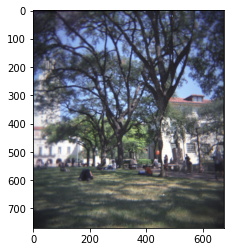

In [11]:
plt.imshow(dst_w_2)
plt.savefig(path+'outputSeamCarvingMall.png')

In [12]:
print(testImage_2.shape,dst_w_2.shape)

(769, 775, 3) (769, 675, 3)


# **SeamCarvingReduceHeight.m(py)**

In [13]:
dst_h = seam_carving.resize(
    testImage, (testImage_w, testImage_h-100),
    energy_mode='backward',  
    order='height-first',  
    keep_mask=None
)

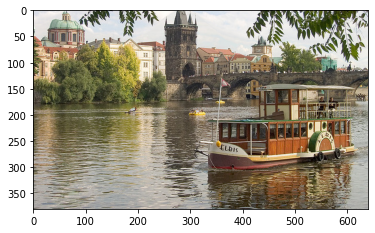

In [14]:
plt.imshow(dst_h)
plt.savefig(path+'outputReduceHeightPrague.png')

In [15]:
print(testImage.shape,dst_h.shape)

(480, 640, 3) (380, 640, 3)


In [16]:
dst_h_2 = seam_carving.resize(
    testImage_2, (testImage_w_2, testImage_h_2-100),
    energy_mode='backward',  
    order='height-first',  
    keep_mask=None
)

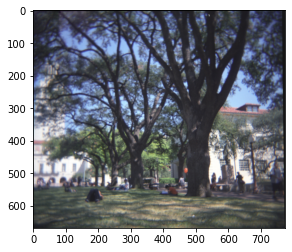

In [17]:
plt.imshow(dst_h_2)
plt.savefig(path+'outputReduceHeightMall.png')

In [18]:
print(testImage_2.shape,dst_h_2.shape)

(769, 775, 3) (669, 775, 3)


# **Part 3**

In [19]:

def energyImage(im):
    filter_du = np.array([
        [1.0, 2.0, 1.0],
        [0.0, 0.0, 0.0],
        [-1.0, -2.0, -1.0],
    ])

    filter_du = np.stack([filter_du] * 3, axis=2)

    filter_dv = np.array([
        [1.0, 0.0, -1.0],
        [2.0, 0.0, -2.0],
        [1.0, 0.0, -1.0],
    ])

    filter_dv = np.stack([filter_dv] * 3, axis=2)

    im = im.astype('float32')
    convolved = np.absolute(convolve(im, filter_du)) + np.absolute(convolve(im, filter_dv))

    
    energy_map = convolved.sum(axis=2)

    return energy_map

[[ 108.  150.  210. ... 1746. 1284.  834.]
 [ 162.  198.  264. ... 3132. 3594. 2398.]
 [  96.  108.  150. ... 3138. 5370. 3804.]
 ...
 [3720. 4308. 4842. ...   48.   78.  168.]
 [2010. 1878. 1146. ...  990. 1044. 1044.]
 [2628. 3114. 3942. ...  450.  486.  468.]]


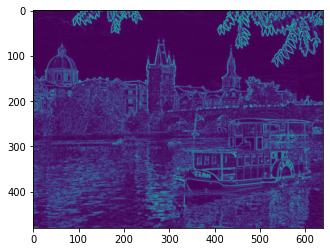

In [20]:
energy_image = energyImage(testImage)
print(energy_image)
plt.imshow(energy_image)

In [21]:
#this is one attempt that ended up not working out
def cumulative_minimum_energy_map( energyImage, seamDirection ):

   x,y= energyImage.shape

   #horizontal
   if (seamDirection, 'HORIZONTAL'):
     for j in range(1,y):
       energyImage[:,j] = energyImage[:,j] + cv2.erode(energyImage[:,j-1], np.array([[1],[1],[1]]))

   #Vertical
   if (seamDirection, 'VERTICAL'):
     for i in range(1,x):
       energyImage[x,:] = energyImage[i,:] + cv2.erode(energyImage[i-1,:], np.array([1,1,1]))
 

In [22]:
#this attempt works just fine but it does not exactly follow the instructions

def cumulativeEnergyMap(image):
	rows, columns, _ = image.shape
	energy_map = energyImage(image)

	current_map = energy_map.copy()
	goback = np.zeros_like(current_map, dtype = np.int)

	for i in range(1, rows):
		for j in range(0, columns):
			if j == 0:
				min_index = np.argmin(current_map[i - 1, j : j + 2])
				goback[i, j] = min_index + j
				min_energy = current_map[i - 1, min_index + j]

			else:
				min_index = np.argmin(current_map[i - 1, j - 1 : j + 2])
				goback[i, j] = min_index + j -1
				min_energy = current_map[i - 1, min_index + j - 1]

			current_map[i, j] += min_energy

	return current_map, goback

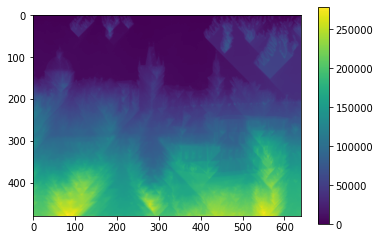

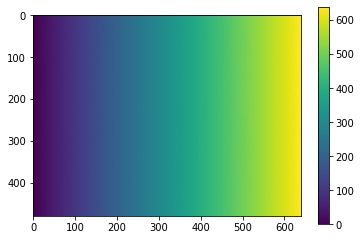

In [23]:
a = cumulativeEnergyMap(testImage)

plt.figure()
plt.imshow(a[0])
plt.colorbar()

plt.figure()
plt.imshow(a[1])
plt.colorbar()

# **Part 4**

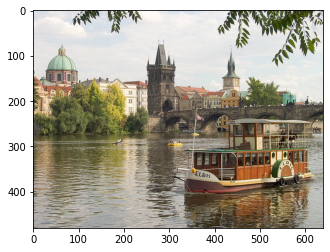

In [24]:
plt.imshow(testImage)

In [25]:
def verticalSeam(image):

	rows, columns, _ = image.shape
	cMap, goback = cumulativeEnergyMap(image)

	mask = np.ones((rows, columns), dtype = np.bool)

	j = np.argmin(cMap[-1])

	for i in reversed(range(rows)):
		mask[i, j] = False
		j = goback[i, j]

	mask = np.logical_not(mask)
	image[...,0][mask] = 0 
	image[...,1][mask] = 0
	image[...,2][mask] = 255

	return image


In [26]:
def horizontalSeam(image):

	rows, columns, _ = image.shape
	cMap, goback = cumulativeEnergyMap(image)

	mask = np.ones((rows, columns), dtype = np.bool)

	j = np.argmin(cMap[-1])

	for i in range(columns):
		mask[j, i] = False
		i = cMap[j, i]

	mask = np.logical_not(mask)
	image[...,0][mask] = 0 
	image[...,1][mask] = 0
	image[...,2][mask] = 255


	return image

In [27]:
testImage.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

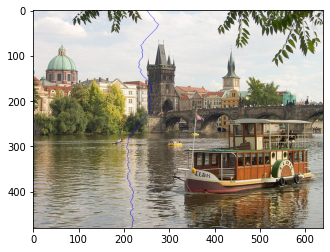

In [28]:
b = verticalSeam(testImage.copy())

plt.imshow(b)

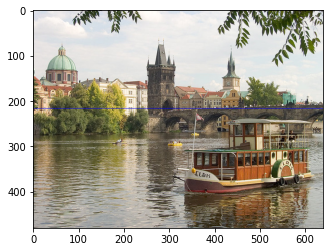

In [29]:
c = horizontalSeam(testImage.copy())

plt.imshow(c)

# **Part 6**

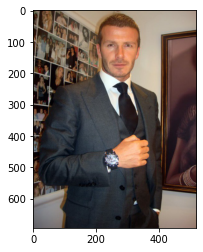

In [30]:
fig1=mpimg.imread('/content/drive/MyDrive/msml_640/Yaaqob_Aisin_ASN2/12506746_f520.jpg') 
plt.imshow(fig1)

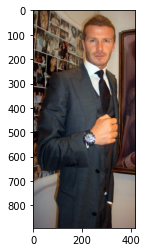

In [34]:
fig1_h, fig1_w,_= fig1.shape

fig1_reduced = seam_carving.resize(
    fig1, (fig1_w - 100, fig1_h+200),
    energy_mode='backward',  
    order='width-first',  
    keep_mask=None
)

plt.imshow(fig1_reduced)

In [35]:
fig1.shape

(693, 520, 3)

In [38]:
from scipy.misc import imresize

scipy_fig1 = imresize(fig1,[693-100,520+200,3])

# somehow I don't get to do this part

ImportError: ignored

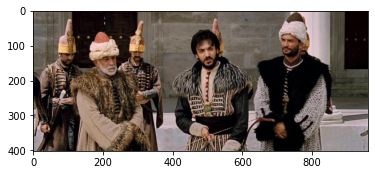

In [31]:
fig2=mpimg.imread('/content/drive/MyDrive/msml_640/Yaaqob_Aisin_ASN2/485354_134815023354448_211163884_n.jpg') 
plt.imshow(fig2)

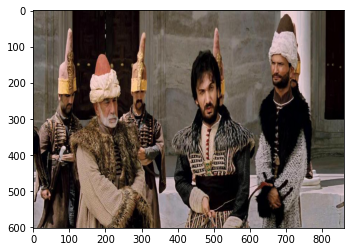

In [39]:
fig2_h, fig2_w,_= fig2.shape

fig2_reduced = seam_carving.resize(
    fig2, (fig2_w - 100, fig2_h+200),
    energy_mode='backward',  
    order='width-first',  
    keep_mask=None
)

plt.imshow(fig2_reduced)

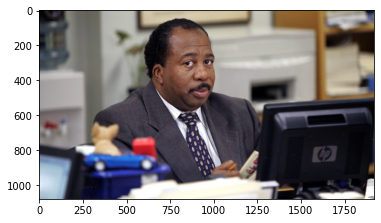

In [32]:
fig3=mpimg.imread('/content/drive/MyDrive/msml_640/Yaaqob_Aisin_ASN2/the-office-stanley-1.jpg') 
plt.imshow(fig3)

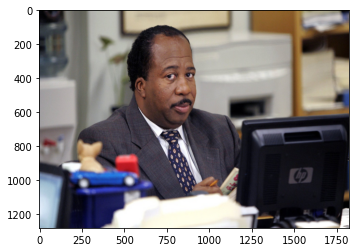

In [40]:
fig3_h, fig3_w,_= fig3.shape

fig3_reduced = seam_carving.resize(
    fig3, (fig3_w - 100, fig3_h+200),
    energy_mode='backward',  
    order='width-first',  
    keep_mask=None
)

plt.imshow(fig3_reduced)